In [75]:
# Just run this cell. 
import warnings
warnings.simplefilter('ignore', FutureWarning)

from hidden import *

# Model Building

The goal of this notebook is to give you a hands-on experience of building a model for real-world data and then making decisions based on conclusions drawn using the model. This may sound abstract and daunting at first, but by the end, you will be able to
* choose a mathematical function that captures the overall trend of the data;
* know what it means to "fit a model to data";
* make predictions using a model;
* estimate the confidence interval of your prediction;
* use your model to detect a signal;
* know what it means to refine a model;
* recognise when a model can be improved to capture more patterns in the data;
* make policy recommendations informed by model predictions;

We ask that you complete the content of this notebook linearly for the best learning experience. The questions should be slightly tricky but fun to think about, and it's ok if you answer them wrong! If you look ahead, you may encounter spoilers, which means that you will learn less!

## Part 1: Pre-lab 

Suppose you collected a set of data (e.g. hare population on an island) over a certain period of time. You want to describe the overall trend of the data in a concise way, using a mathematical function. The following are four different mathematical functions (linear, quadratic, Gaussian, and cosine) that you tried. When plotted on a graph, each mathematical function appears as a curve, and the shape of the curve is meant to capture the overall trend of the data. Although the word "model" has a more general meaning, it simply means "mathematical function" in the context of modelling numerical data.

_(Don't worry yet about the units of time or value. We purposefully hid these from you for the moment.)_

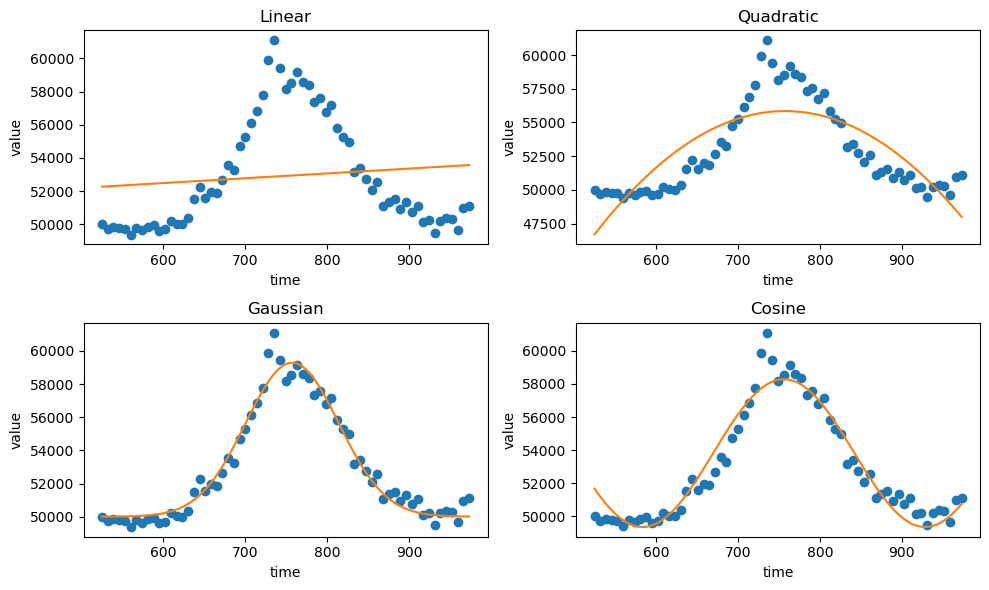

In [76]:
# Just run this cell. 
fit_pre_lab_models()
plt.show()

**Question 1.1:** Looking at the four model curves above (linear, quadratic, Gaussian, cosine), which model(s) seem to capture the trend better?

_Replace this with your answer._

**Question 1.2:** Suppose you have two models that fit data within this time range equally well. How would you decide which model is _actually_ more accurate? _Hint: A main purpose of a model is to help us make predictions._

_Replace this with your answer._ 

Let us now show more of the data outside of the original range of time. The grey background indicates the extended range of time. The same mathematical functions are plotted over this larger range of time.

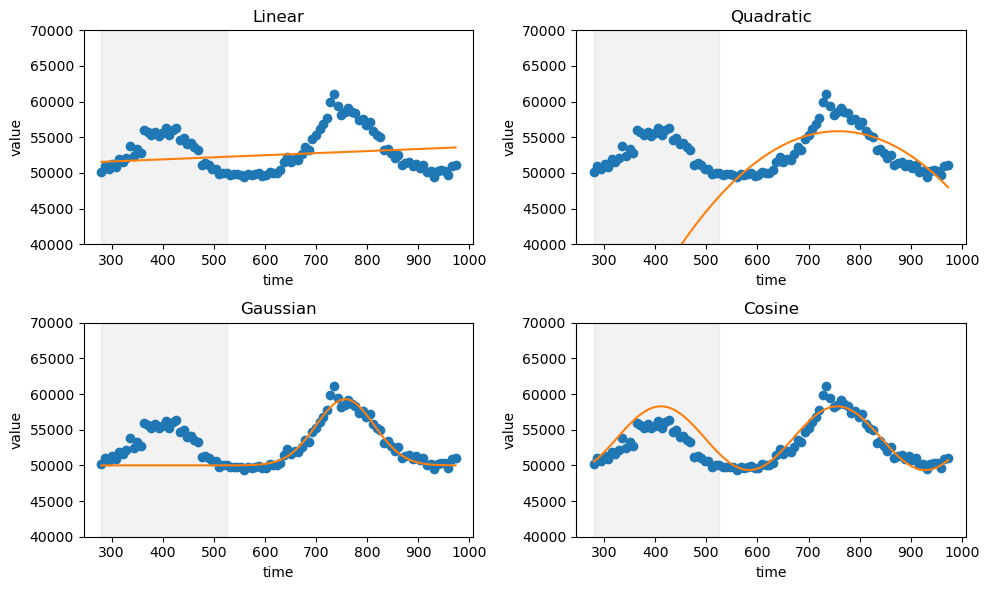

In [77]:
# Just run this cell. The gray portion represents the added data. 
expanded_plot()

**Question 1.3:** Looking at the data collected over a larger range of time, which of the four models now best capture(s) the overall trend? In other words, which model fits the data outside of the range just as well as inside? **[Hint: There's more than one! Think a bit before moving on.]**

_Replace this with your answer._

**Takeaway:**
1. Even if a model describes the trend of the data well inside of some time range, it may deviate far from the data outside of this range. Since our goal is to make predictions using the model, it is important that it describes the trend just as well outside of the range as inside. This is why the cosine model should be chosen over the Gaussian model.
2. A model doesn't have to fit the data exactly, i.e. the model curve doesn't have to pass through all (or any) of the data points. In fact, the linear model above captures an even larger trend (the height of the peaks is going up), just not the finer ups and downs. The linear curve successfully captures the "average value" of each of the peaks, and it works just as "well" for the first peak as it does for the second peak.

Let us only focus on the linear and cosine models.

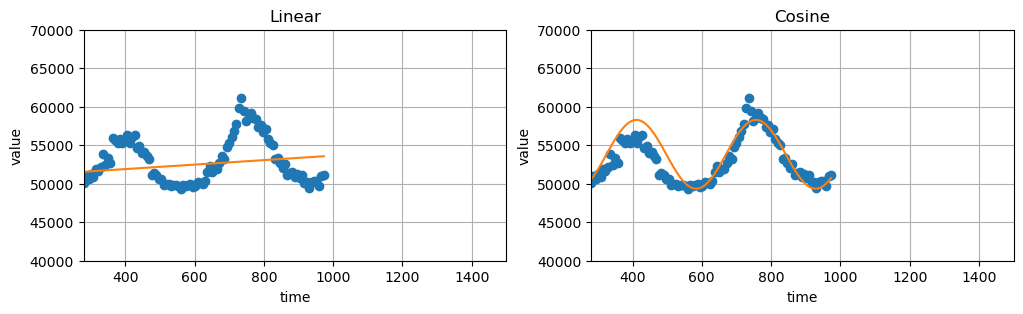

In [78]:
plot_linear_cosine(12,3)

$$
\textbf{Linear:}\quad y = 2.91x + 50736.47 \quad \textbf{Cosine:}\quad y = -4471.764 \cdot \cos(0.02x - 4.35) + 53819.10
$$

In [79]:
# You can use this cell to run your calculations
linear_at_1200 = ...
cosine_at_1200 = ...

**Question 1.4**: Extend each of the models above towards the right to give a prediction of the value at $x = 1200$, along with a very rough confidence interval for each prediction, i.e. 90% confident that the true data point at x=1200 will lie within this range of values. _Hint: Use the formulas of the models above. To estimate the confidence interval of your prediction, see how far along the y-axis the original data typically deviates from the model curve._

_Edit this markdown cell and report your answer for each item below._

- Prediction from the linear model: 
- 90% confidence interval: from ... to ...
- Prediction from the cosine model: 
- 90% confidence interval:

**Question**: Which model gives a more _precise_ prediction, i.e. its confidence interval is narrower? Are the two models' predictions at $x=1200$ consistent with each other, i.e. do the two confidence intervals overlap with each other?

_Replace this with your answer._

**Takeaway**: Sometimes, two models that seem drastically different can make similar predictions, if they each capture some overall trend of the data. If the confidence intervals of the models overlap, that means the predictions from both models are consistent with each other, and we may choose to use either one to make decisions. In our case, the linear model is easier to calculate than the cosine model since it has fewer parameters (two versus four), but its prediction is less precise since the confidence interval is wider. Even though the linear model fits the data less accurately than the cosine model, we can still make useful predictions using it.

___

## Part 2: The linear model

Now, we'll look at an even wider range of the full data. We will be using the crude linear model to make predictions and identify when something suprising happens, i.e when the data deviates a lot from the model.

Let's start by loading our data and storing the time values in `xdata` and values in `ydata`. Remember, we are purposefully hiding the meaning of this data from you.

In [80]:
timeseries_data = get_data()
xdata = np.array(timeseries_data['time'])
ydata = np.array(timeseries_data['value'])

In this section of the notebook, we will visualize, analyze and fit our data to a model and investigate whether our model is good. To begin, let's plot our timeseries data. You'll recognize parts of this data from Part 1 above.

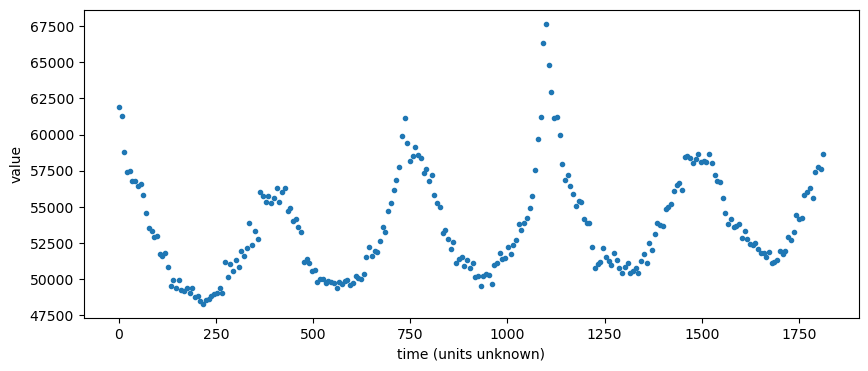

In [81]:
plt.figure(figsize=(10, 4)) 
plt.plot(xdata, ydata, '.')
plt.xlabel('time (units unknown)') 
plt.ylabel('value')
plt.show()

Despite the ups and downs in the data, the waviness slowly rises over time. We will use a linear model to describe this overall rising pattern of this data and ignore the ups and downs for now. Recall from the prelab that even a very crude model can be very useful.

**Question**: Use the widget below to manually find that parameters of for "the average is slowly rising" pattern, and record the values you pick in the respective variable names.

In [82]:
linear_widget()

interactive(children=(FloatSlider(value=1.0, description='Slope', max=5.0, min=-5.0, step=0.01), IntSlider(val…

In [83]:
slope = ...
vertical_shift = ... # Change this to vertical shift [intercept]

What we did above was by eye. There are statistical tools that help us find the best fit. 

Now, we will use the `scipy` libray to calculate the best-fitting line.

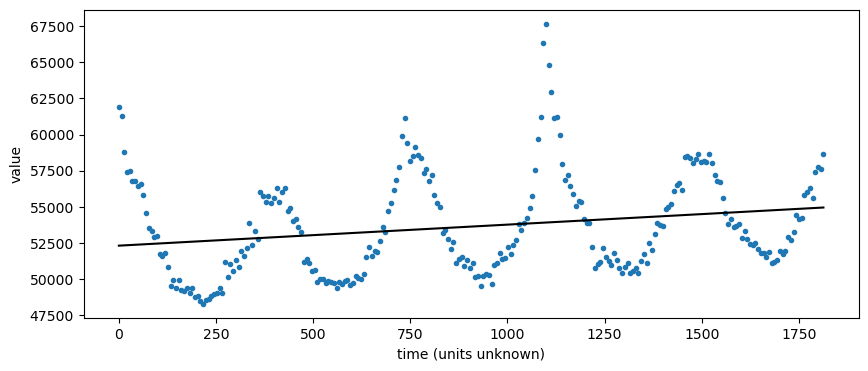

In [84]:
# Just run this cell
popt, _ = curve_fit(linear_model, xdata, ydata)
m_fit, c_fit = popt

plt.figure(figsize=(10, 4))
plt.plot(xdata, ydata, '.')
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), color="black")
plt.xlabel('time (units unknown)')
plt.ylabel('value')
plt.show()

In [85]:
print(f"The best fit line's slope is {m_fit:.3f} and the intercept is {c_fit:.0f}")

The best fit line's slope is 1.456 and the intercept is 52305


**Question**: Compare these numbers to the ones you chose above?

Potentially define threshold for students as a way to describe the width of the band.

In [86]:
plot_lin_band()

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

Outside of this range, we want to make prediction. We'll reveal the true nature of the data soon.

For now, pretend the data is about the seasonal hare population on some island and the time is in weeks. We need to know when something abnormal happens to the hare population at some later time. That means we need to give a range of values in which the hare population is normal and if a future hare population value is outside of this range, then we can say something suprising happened to our hares.

**Question:** Using the percentages below, adjust the slider to find what is the amount of deviation from the model within which 90% of the data lies? 

- 68%:
- 80%:
- 95%:

**Takeaway:** If a future value, say t = 2000, falls outside the 95% band, then we can be 95% sure that something abnormal has happened, in this example to the hares. In other words, there is only a 5% chance that this far-from-threshold value can arise by chance based on our model.

**Question:** Set `deviation_at_95_percent` to the value you found in the question above.

In [87]:
deviation_at_95_percent = 6100

Now, some time has passed and we have collected a couple more points of data, and it seems like something suprising has happened. We can say this precisely using statistics!

In [88]:
# %matplotlib notebook

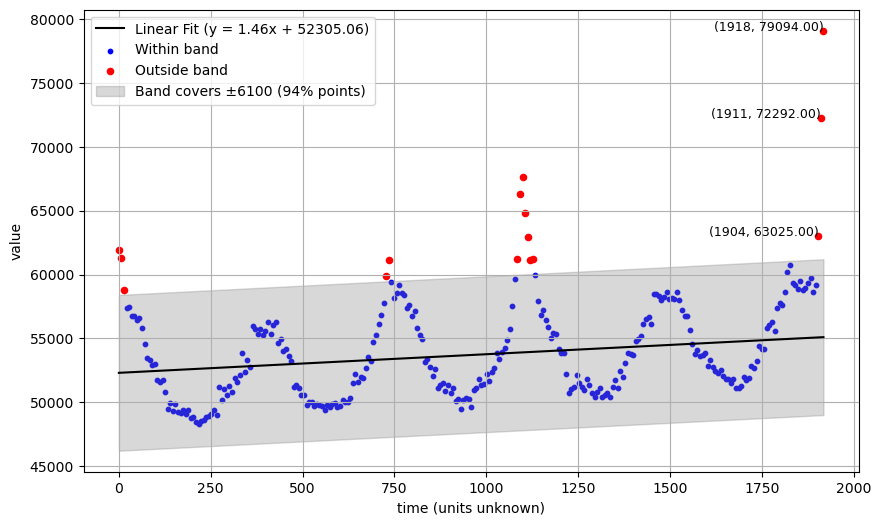

In [89]:
plot_lin_all(deviation_at_95_percent) 

Now we will plot the  rest of the data, put in threshold values to the value you obtained above the function below that will plot threshold band and show the red points.

**Question:** From the plot above, at what time value does our new data start to deviate significantly from the model? This is when you should alarm the wildlife biologists about the hare population. 

In [90]:
# Replace the ... with the time value you identified
time_value = 1904

**This data is not about the hare population. In fact, it is about the total number of deaths in the United States in any given week.**

As a statistician at the CDC, your job has been to monitor this data. You've found this date where the weekly death count has surpassed your threshold (outside the band), what would you report to your superior? Include the statement of fact and your credence level. 

_Replace this with your answer_

Answer: At the threshold we choose, we would sound At 95%, in every 20 alarm, there is one that is false positive. On average, you would have 2.5 false alarms.

**Takeaway:** We chose a model (linear) that captured the overall trend of our data and fitted the model to our data. Then we we're able to identify the range of values in which, say 95%, our data falls. If any future data point falls outside of this range, then we can be 95% sure that it is a "signal" (something that is out of the ordinary of the usual trend).

___

[For us] Where we are using error bars
- deviation from a model (based on a residual) for capturing suprise points 
- measurement errors
- intrinsic fluctuation (coming from the poisson model), get about ~250

## Part 3: Refining the model

We used our very crude linear model to make a real world alarm for weekly deaths in the US. But obviously the model was very crude. Can we do better?

The linear model captured the overall slight rise of our data over time. However, there is clearly a periodic fluctuation that is not captured by the linear model. How do we systematically show that there are still patterns in the data that have not been captured by the model we have chosen?

To do that, we have to know how precisely the data was collected. In other words, we need to estimate the measurement error of our data.

If the measurement errors are very big (that is, measurements are very imprecise), then any remaining pattern may just be a result of random measurement error. Other the other hand, if the measurement errors are very small (that is, very precise), then we more confident that the remaining patterns are real and can be captured by a refinement of our model.

We will walk you through this process.

_Heads up, we will discuss systematic uncertainty later._

There are two sources of statistical uncertainty. 

First, is that the true value is random. In other words, in any given week, the number of deaths could be higher or lower just by chance, rather than some common cause. Suppose that in any given year we have 2.8 million deaths, this averages to about 53000 deaths a week (comparable to our data). Click the following button many times to see the actual number of deaths a week. 

In [91]:
plotMockWeeklyDeathsWithButton() # You need to click the button to start seeing an output

#Question for Winston: included the slide because we dicussed it, but is it necessary?
# Just say the fluc, so remove slider, 

Button(description='Simulate weekly deaths', layout=Layout(width='200px'), style=ButtonStyle())

Output()

**Question:** Do this 10 times. Write down the numbers and estimate the 68% CI.

In [18]:
results_10_trials = [...]
ci = ...

**Question:** Is the true number of deaths always equal to the average value of 53,000? If not, how much does it fluctuate? Crudely estimate the 68% confidence interval by clicking the button many times.

_Replace this with you answer_

**Takeaway:** The value you typed above is the instrinsic statistical error in the true number of deaths. In other words, the true number of deaths per week fluctuates by about this amount by random chance alone. 

The second source of uncertainty is from the measurement of the true value. The measurement uncertainty means that a true value exists but what we measure may be slightly higher or lower due to imperfections in the measurement instrument. In our case, the measurement instrument is clerical records (the manual collection of instances of death). 


In [19]:
intrinstic_fluctuation = 250

**Question:** Come up with ways the clerical recording of deaths may be inaccurate? Is each of these a source of statistical or systematic error?

_Replace this with you answer_

Unfortunately the CDC did not provide us with an estimate of a clerical error. Usually these records are kept up with well, but there are mistakes with people not knowing when deaths are happening. What percentage of deaths do you believe are miscounted? Could it be as high as 1 in 10 or as low as 1 in a milliion deaths?

In [20]:
measurement_error = 250

For the rest of the excercise, let's assume that the measurement error due to clerical error is comparable to that of the intrinstic flucuation of the true number of deaths. 

In [21]:
total_error = intrinstic_fluctuation + measurement_error

[Edit, need motivation for why 68%] If our model captured the underlying patterns in the data perfectly, we would expect that the model curve would pass through 68% of all the error bars because statistical uncertainity exists.

When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

Let's see how our very curde model (which clearly didn't capture all the patterns) performs.

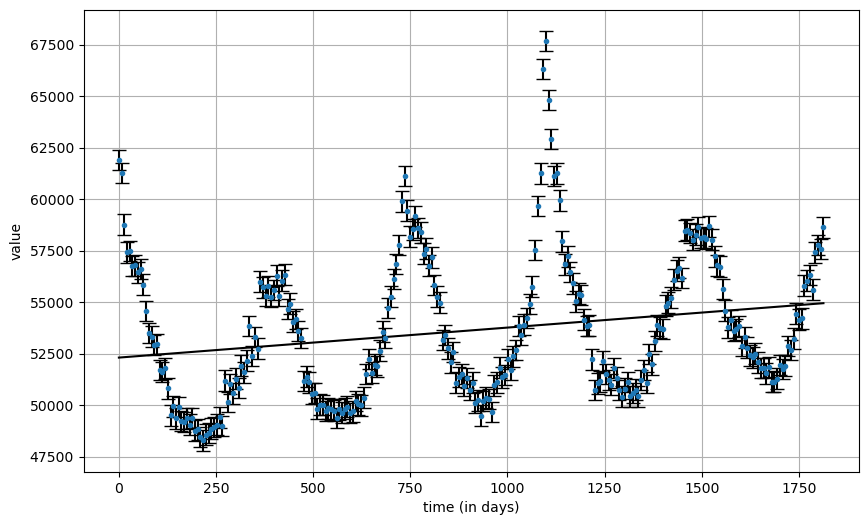

In [92]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=total_error, fmt='.', ecolor='black', capsize=5)
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), '-', label='fit', color = "black")
plt.xlabel('time (in days)')
plt.ylabel('value')
plt.grid(True)
plt.show()

Now, let's actually calculate that percent.

In [93]:
yerr = total_error # This is the +/- 1000 given to you. 

lin_mod = linear_model(xdata, m_fit, c_fit)
error_bar_passes = ((lin_mod >= (ydata - yerr)) & (lin_mod <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The linear model passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The linear model passes through 21 error bars out of 260 points.
Percentage: 8.08%


**Question:** Based off the percent of error bars, do you think we should add more complexity or is our model? Explain your reasonsing.

_Replace this with your answer._

**Takeaway**: We should expect our model to capture 68% of the points because our confidence in data point true value is 68% (hence 68% error bars). Because our model does not capature 68% of the points, there is room to refine our model to capture more of those data points.

From the linear model we have captured slowly rising trend in our data. Let's add a cosine curve on top of the linear model to also capture the periodic fluctuations. Below is the model equation (you can think of it as a cosine curve with a tilt).

$$
f(x) = A \cos\left(\frac{2\pi}{T}(x-x_0)\right) + Bx + C
$$

Heads up, we will see if these parameters make sense (i.e. should find that a year is 365 days) later in the notebook.

In [94]:
cosine_linear_widget()
# Fix lag by making step size larger; also fix words 

interactive(children=(FloatSlider(value=0.0, description='amplitude', max=10000.0, readout_format='.0f', step=…

In [95]:
a = ... #amplitude
t = ... #period
x_0 = ... #phase shift
b = ... #slope
c = ... #vertical shift
guesses = [5112, 365, 35, 54000, 1.4]

Providing initial guesses for more complex models can help guide the computational process towards a more accurate and efficient solution. Use the widget below to experiment with what you can use as your intial guesses for the parameters A, T, x0, B and C. Don't worry about fitting the perfect model, a rough start is to get started will be good enough for our optimizing function later!


[Should we include?] Using the values for A, B, C, and D above as our guesses, let's find the best parameters that minimize error. This may be unfamiliar, but we will leverage `curve_fit` function from the scipy.optimize library which finds the best fit model (given we provide good starting point), doing most of the heavylifting for us. You can read the documentation here for [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) if you're curious.

In [96]:
plot_tilted_band() # maake this an argument, takes in a guess and refines it
plt.show() # get rid of array 

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

**Question:** How far to we have to do from our model now to capture the 95% of the points? How does this compare to the linear model? 

_Replace this with your answer._

The linear curve captures the rising trend, but there is clearly also a smaller wavy trend using the cosine model. Now that we are considering both the long term trend vs short-term fluctuation we are able to capture our data much more precisely with our data.

Let's calculate the number of error bars now. 

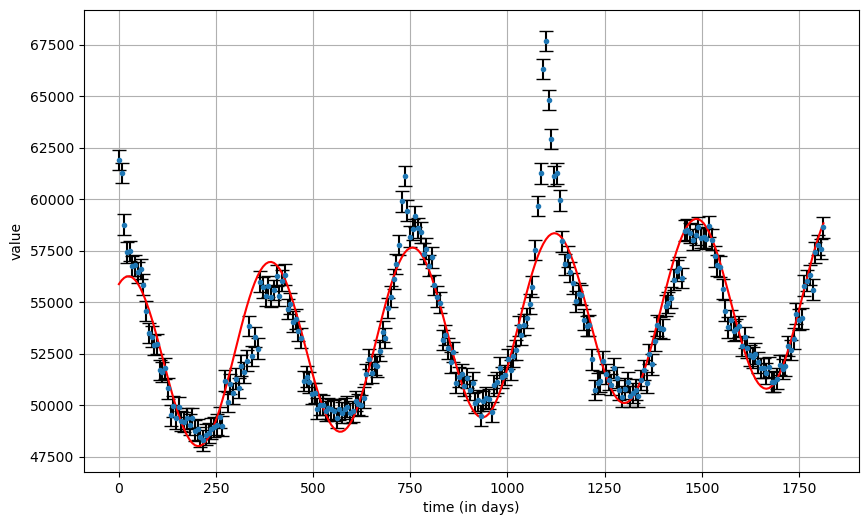

In [43]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=500, fmt='.', ecolor='black', capsize=5)
plt.plot(xdata, fit_data_with_tilt, '-', label='fit', color = "red")
plt.xlabel('time (in days)')
plt.ylabel('value')
plt.grid(True)
plt.show()

In [28]:
yerr = total_error ## use the values calculated av=bove, refer to them to explain the text, hide this code as well 

error_bar_passes = ((fit_data_with_tilt >= (ydata - yerr)) & (fit_data_with_tilt <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The fit line passes through 92 error bars out of 260 points.
Percentage: 35.38%


**Question**: How many more error bars is your model now passing through? Can we refine our model any further?

Replace this with your answer.

**Takeaway:** We have now more accurately modeled the weekly deaths. According to our estimates of uncertainty, we can still do better because we haven't yet pass through 68% of the error bars. 

The whole threshold story, the whole data.

Though the two models performed similarly, can you imagine a hypothetical situation where a suprising excess death count would be better cpature by our cosine model but the linear model. 

Better wordiing, make into a questions
Even though with both model we sounded the alarm in the same week, there are situations in which the tilted cosine model is able to identify a signal that the linear model can not.

Hint: Think about the shape of our bands. 

Answer: On the way down.

Takeaway: We have accurately modeled the weekly deaths up to statistical uncertainties that we know that exist, assuming we have done the error bar estimations correctly.  Any further modeling would have to incorportate modeling the sources of these uncertainties.  

[ADD the three points]

## Part 4: Estimate the total number of excess deaths

[Edit] Earlier we came up with a test the identify a signal, when something is out of the oridinary. In the context of weeekly deaths, that is more deaths than expected or less. 

[Definintion of excess deaths].
A subset of deaths are those who died in hospitals and were tested positive. But someone people die at home. 
As public health officials, we would like to have an independent measure of the deaths.

This is an independent measure of the pandemic. 

The model curve gives us the amount of deaths we expect. The data point gives us the actual number of deaths. The difference tells us the amount of unexpected deaths (+ number is more deaths, - number is less deaths) in any given week. 

The accumulated number of unexpected deaths (excess deaths) is just the sum of weekly excess deaths over a period of time. 

Now that we have more complete model, we can calculate the difference between the number of deaths we actually saw and what we expect given our model. We can call this difference the number of **excess deaths**. 

**Question:** Would you expect the total number of excess deaths between March 7, 2020 and Sept 23, 2023 is higher, lower or equal to  the number of COVID-related deaths recorded by hospitals?

**Question:** Why would it be valuable to estimate this number?

As soon as you sounded the alarm, hell broke loose, and the number of weekely deaths since has been abnormal. Fast forward three years since we saw our first signal and we now have a more comprehensive data. Let's plot it below over the model we defined earlier. In short, supposing that our ealrier range of data is normal and expected, we are estimating how much out of the ordinary the rest of the data is. 

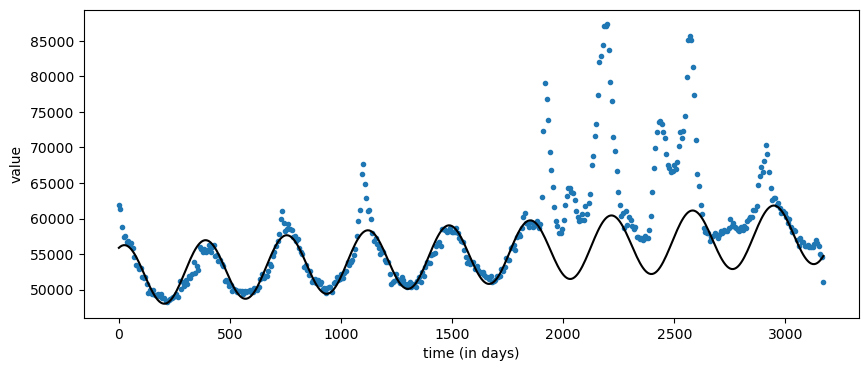

In [103]:
plt.figure(figsize=(10, 4))
plt.plot(all_xdata, all_ydata, '.')
 # have students do this, show how tilted cosine function works
model_ydata = tilted_cosine(all_xdata, A_fit, T_fit, x0_fit, B_fit, C_fit)
plt.plot(all_xdata, model_ydata, color="black")
plt.xlabel('time (in days)')
plt.ylabel('value')
plt.show()
march_07_2020_day = pd.to_datetime('2020-01-01')
# Color the new points a different color

In [99]:
# This finds the index point that represents the heightened appearance of COVID-19 in the US.
march_07_2020_day = pd.to_datetime('2020-03-07')
march_07_2020_index = excessdeaths[excessdeaths['Week Ending Date'] == march_07_2020_day].index[0]
march_07_2020_index

269

In [104]:
# Scaffold this out...

In [105]:
model_deaths = sum(model_ydata[march_07_2020_index:])
actual_deaths = sum(all_ydata[march_07_2020_index:])
excess_deaths = round(actual_deaths-model_deaths)
excess_deaths

1365753

The last week recorded in this data set is `'2023-09-23'`. In the 1,288 days first week of February in 2020 and the last day this. 

**Question**: The CDC used a more sophisticated model (a further refinement of our model), and using their model, they also computed an excess deaths number. Refer to their website, state what number of excess deaths they estimated, how does it compare to the value you obtained? (Link: https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm)

**Question**: The numbers are not the same (but very close), and it's because we chose different models. We could have also calculated the number of excess deaths with our linear model above and gotten another different number. Is there a true number of excess deaths? 

**Question**: To what, extent can we say that the pandemic caused these excess deaths? Use the language of singlular and general causation and Hill's Criteria?

**Question**: Causal pathway (singular vs general causation). Name a few alternative causal pathways that would increase the number of excess deaths. Name some that decrease the number. (Hint: Think of a few government policies that affects the behavior of people.)

In addition through the virus directly casuing deacths, the pandemic caused the governemnt to implement certain policies that either added to or took away from the number of deaths. 
- Someone should have gotten a check up and had to delay so their serious illness was not detected in time. 

Rank your answers from the greatest effect to the lowest effect. 

Let's apply this to climate modeling. What does it mean when there is an abnormal climate problem...

## Part 5: Interpreting Model Parameters

[WRITE] // graf about how we just chose some function, but actually the story doesn't end there 
// we want to understand what these numbers mean physicall (why are these the numbers are model picked?); general motivation

[EQ] // show the best fit model here again 

Let's create a physical description of every parameter in the model, i.e, that each parameter corresponds to something real in the world.

1. Period (T)
- Have them discover the number and ask if its what they expect
- Give a physical explanation of why it is this number. 
    - It's distance between two peaks 

2. Phase Shift (when the peak begins in a year
    - Give an annotated graph with the actual dates
    - Explain that cosine begins with a peak (show that)
    - Tells us how many from the start of our data collection that we reach our first peak
    - Where in the year is this; can you think if a physical explanantion for his

3.  Amplitude 
    - Half of the fluctuation of weekly death counts over a year
    
4. Vertical Shift 
    - Average weakly death count at start of data collection

5. Slope
    - What is the increase in the average weekly deaths / week?
    - Find the % increase in weakly deaths 
    - 1.9 more deaths per day 
    - 1.3% (vs 0.5-1% in 2020) --> same order of population growth
        1. comparable (same order of population growth)
            Why related?
        2. Give some explanation on why out percent growth might be a bit higher? 
             - Overall pop growth includes younger ppl, differnt rate of increase of aging population 
    

% pop growth: https://datacommons.org/tools/timeline#&place=country/USA&statsVar=GrowthRate_Count_Person

<!-- **Question 1.3.7**: What did adding more complexity to our model do? How do you now feel about calling our current model "a good model"? -->

# Post-lab

## Reflection

Write some pros and cons of the linear and cosine model.

- The cosine model has a smaller prediction level. If something bad happens, we can catch it more accurately. More complicated.
- The linear model has a larger prediction level. Less complicated.

** Want to emphasize the real world implications.  

## Part 5: Hill's Criteria

As of June 2023, [over 1 million people in have died from COVID-19 in the US](https://www.nfid.org/infectious-diseases/covid-19/) since the virus first emerged. Looking back now, it's obvious the massive increase in excess deaths we saw once we applied our model to our new data came from deaths related to COVID-19.  

However, without this hindsight, our national government asks what else could be causing this uptick before jumping the gun and alerting the whole nation. How do we know COVID-19 directly created more excess deaths? It is impossible to conduct an RCT and introduce the virus to some populations and not in others. Instead we can use Hill's Criteria to show compelling evidence that COVID-19 _causes_ excess mortality.

**Question 3.1:** For each of Hill's criteria, what evidence, if observed, would support that criterion?

- **Prior Plausability:** _Replace this text with your answer_
- **Temporality/Temporal Sequence:** _Replace this text with your answer_
- **Specificity:** _Replace this text with your answer_
- **Dose-response Curve:** _Replace this text with your answer_
- **Consistency Across Contexts:** _Replace this text with your answer_




## Part 6: Orders of Understanding  [try adding into the model building, no jargon]

Looking back, let's explore the order of understanding for each parameter we we added into our model.

- 1st order - the mean (caputured the data into a single number, what does a deviation from the linear mean), season fluctation, not random
- 2nd order – the fluctuation (pattern is captured by cosine, with three parameters), this capture more of the data pattern
- 3rd order – the drift (population growth) 

Creating a model can be complicated at first, but it can be built up slowly.

**Question 4.1**: When do we know when to stop? Consider if it is necessary or useful to know what each parameter means?


_Replace this text with your answer_

**Question 4.2**: Large langauge models (LLMS) are giant models with billions of parameters that are applied on a large amount of data for training and inference. What problems might we run into? 

_Replace this text with your answer_

## Estimate the total number of excess deaths


Calculate the excess, small coding exce

Take the residual from that day onwards from that day onwards

Why hide the context? Blind analysis and avoid confirmation bias because we already know when COVID has happened.  

## Sanity check 


Interpret each of the parametrs
Interpret the title (population growth per week), look at external sources
//Double check the values 